In [23]:
try:
    import pandas as pd
except ModuleNotFoundError:
    %pip install pandas
    import pandas as pd

try:
    import numpy as np
except ModuleNotFoundError:
    %pip install numpy
    import numpy as np

try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    %pip install matplotlib_pyplot
    import numpy as np
    import matplotlib.pyplot as plt

**Pandas** — главная библиотека в Python для работы с данными. Её активно используют аналитики данных и дата-сайентисты. Библиотека была создана в 2008 году компанией AQR Capital, а в 2009 году она стала проектом с открытым исходным кодом с поддержкой большого комьюнити.

Вот для каких задач используют библиотеку.



*   **Аналитика данных: продуктовая, маркетинговая и другая.** Работа с любыми данными требует анализа и подготовки: необходимо удалить или заполнить пропуски, отфильтровать, отсортировать или каким-то образом изменить данные. Pandas в Python позволяет быстро выполнить все эти действия, а в большинстве случаев ещё и автоматизировать их.
*   **Data science и работа с большими данными.** Pandas помогает подготовить и провести первичный анализ данных, чтобы потом использовать их в машинном или глубоком обучении.*Курсив*
*   **Статистика.** Библиотека поддерживает основные статистические методы, которые необходимы для работы с данными. Например, расчёт средних значений, их распределение по квантилям и другие.

**Установка библиотеки**

```
pip install pandas
```

И подключите библиотеку в коде

```python
import pandas as pd
```

**pd** — общепринятое сокращение для Pandas в коде. Оно встречается в книгах, статьях и учебных курсах. Используйте его и в своих программах, чтобы не писать длинное pandas.

**Series и DataFrame**

Данные в Pandas представлены в двух видах: Series и DataFrame. Разберёмся с каждым из них.

# Series

**Series** — это объект, который похож на одномерный массив и может содержать любые типы данных. Проще всего представить его как столбец таблицы с последовательностью каких-либо значений, у каждого из которых есть индекс — номер строки.

```python
s = pd.Series(data, index=index)
```

*   `data` может быть массивом numpy, словарём или скаляром (числом).
*   `index` — список меток, по умолчанию это целые числа от 0 до n-1.

Создадим простой Series:

In [3]:
import pandas as pd

series_example = pd.Series([4, 7, -5, 3])

print(series_example)

0    4
1    7
2   -5
3    3
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print(s)

a    0
b    1
c    2
d    3
e    4
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

s = pd.Series(np.linspace(0, 1, 5))
print(s)

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64


Если data — словарь, а index не задан, то в качестве меток используются ключи словаря:

In [ ]:
import pandas as pd

d = {"a": 10, "b": 20, "c": 30, "g": 40}
print(pd.Series(d))

a    10
b    20
c    30
g    40
dtype: int64


Если передать index, не совпадающий с ключами словаря, то отсутствующие значения будут заменены на NaN:

In [ ]:
import pandas as pd

print(pd.Series(d, index=["a", "b", "c", "d"]))

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64


Если data — число, обязательно передаётся index, определяющий количество элементов:

In [ ]:
import pandas as pd

index = ["a", "b", "c"]

print(pd.Series(5, index=index))

a    5
b    5
c    5
dtype: int64


# Индексация, срезы и арифметика

Объекты Series поддерживают индексирование, срезы и математические операции:



In [ ]:
import pandas as pd
import numpy as np

s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print(s)
print('----')
print(s["a"])             # Один элемент
print('----')
print(s[["a", "d"]])      # Несколько элементов
print('----')
print(s[1:])              # Срез
print('----')
print(s + s)              # Поэлементное сложение

a    0
b    1
c    2
d    3
e    4
dtype: int64
----
0
----
a    0
d    3
dtype: int64
----
b    1
c    2
d    3
e    4
dtype: int64
----
a    0
b    2
c    4
d    6
e    8
dtype: int64


# Фильтрация

Можно использовать булевы условия для отбора значений:

In [ ]:
import pandas as pd
import numpy as np

s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print(s)
print('----')
print(s[s > 2])

a    0
b    1
c    2
d    3
e    4
dtype: int64
----
d    3
e    4
dtype: int64


# Атрибуты Series

У объекта Series есть полезные свойства:

In [ ]:
import pandas as pd

s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])

s.name = "Данные"
s.index.name = "Индекс"

print(s)

Индекс
a    0
b    1
c    2
d    3
e    4
Name: Данные, dtype: int64


# DataFrame

**DataFrame** — основной тип данных в Pandas, вокруг которого строится вся работа. Его можно представить в виде обычной таблицы с любым количеством столбцов и строк. Внутри ячеек такой «таблицы» могут быть данные самого разного типа: числовые, булевы, строковые и так далее.

У `DataFrame` есть и индексы строк, и индексы столбцов. Это позволяет удобно сортировать и фильтровать данные, а также быстро находить нужные ячейки.

Создадим простой `DataFrame` с помощью словаря и посмотрим на его отображение:

In [ ]:
import pandas as pd

city = {'Город': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург'],
        'Год основания': [1147, 1703, 1893, 1723],
        'Население': [11.9, 4.9, 1.5, 1.4]} # Создаём словарь с нужной информацией о городах.

df = pd.DataFrame(city) # Превращаем словарь в DataFrame, используя стандартный метод библиотеки.

print(df) # Выводим DataFrame на экран.

             Город  Год основания  Население
0           Москва           1147       11.9
1  Санкт-Петербург           1703        4.9
2      Новосибирск           1893        1.5
3     Екатеринбург           1723        1.4


Мы видим таблицу, строки которой имеют индексы от 0 до 3, а «индексы» столбцов соответствуют их названиям. Легко заметить, что датафрейм состоит из трёх Series: Город, Год основания и Население. Оба типа индексов можно использовать для навигации по данным.

# Импорт данных

Pandas позволяет импортировать данные разными способами. Например, прочесть их из словаря, списка или кортежа.

Рассмотрим несколько примеров:
**CSV-файлы**

*   Считывание: `pd.read_csv("имя_файла.csv")`
*   Сохранение: `df.to_csv("имя_файла.csv")`

**Excel-файлы (формат 2007+)**

*   Считывание: `pd.read_excel("имя_файла.xlsx")`
*   Сохранение: `df.to_excel("имя_файла.xlsx")`

**JSON-файлы**

*   Считывание: `pd.read_json("имя_файла.json")`
*   Сохранение: `df.to_json("имя_файла.json")`

Полный список поддерживаемых форматов и настроек доступен в официальной документации.


Самый популярный способ — это работа с файлами `.csv`, которые часто применяются в анализе данных. Для импорта используют команду `pd.read_csv()`.

read_csv имеет несколько параметров для управления импортом:


*   `sep` позволяет явно указать разделитель, который используется в импортируемом файле. По умолчанию значение равно `,`, что соответствует разделителю данных в файлах формата `.csv`. Этот параметр полезен при использовании нестандартных разделителей в исходном файле, например табуляции или точки с запятой;
*   `dtype` позволяет указать тип данных в столбцах после загрузки файла формата `.csv`. Полезно в тех случаях, когда формат данных автоматически определился неверно. Например, даты часто импортируются в виде строковых переменных, хотя для них существует отдельный тип.

Давайте импортируем датасет с информацией о скорости мобильного и стационарного интернета в отдельных странах. Готовый датасет [скачиваем с Kaggle](https://www.kaggle.com/datasets/prashant808/global-internet-speed-2022). Это файл в формате .csv. Параметры для read_csv не указываем, так как наши данные уже подготовлены для анализа.


In [ ]:
import pandas as pd

df = pd.read_csv('Internet Speed 2022.csv')

print(df)

               country  broadband  mobile
0               Monaco     261.82     NaN
1            Singapore     255.83  105.01
2            Hong Kong     254.70   83.58
3              Romania     232.17   59.67
4          Switzerland     229.96  135.70
..                 ...        ...     ...
172  Equatorial Guinea       7.95     NaN
173              Sudan       7.92   14.51
174              Yemen       7.59     NaN
175       Turkmenistan       4.11     NaN
176               Cuba       4.01   25.02

[177 rows x 3 columns]


В верхней части датафрейма мы видим названия столбцов: country (страна), broadband (средняя скорость интернета) и mobile (средняя скорость мобильного интернета). Слева указаны индексы — от 0 до 176. То есть всего у нас 177 строк. В нижней части таблицы Pandas отображает и эту информацию.

Выводить таблицу полностью не обязательно. Для знакомства с данными достаточно показать пять первых или пять последних строк. Сделать это можно с помощью `df.head()` или `df.tail()` соответственно. В скобках можно указать число строк, которое которые будут выведены. По умолчанию параметр равен 5.

In [ ]:
print(df.head())

       country  broadband  mobile
0       Monaco     261.82     NaN
1    Singapore     255.83  105.01
2    Hong Kong     254.70   83.58
3      Romania     232.17   59.67
4  Switzerland     229.96  135.70


In [ ]:
print(df.tail()) # Последние 5 строк

               country  broadband  mobile
172  Equatorial Guinea       7.95     NaN
173              Sudan       7.92   14.51
174              Yemen       7.59     NaN
175       Turkmenistan       4.11     NaN
176               Cuba       4.01   25.02


In [ ]:
print(df.info()) # Информация о DataFrame (типы, память)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    177 non-null    object 
 1   broadband  177 non-null    float64
 2   mobile     136 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB
None


In [ ]:
print(df.shape) # Размерность (строки, столбцы)

(177, 3)


In [ ]:
print(df.columns) # Имена столбцов

Index(['country', 'broadband', 'mobile'], dtype='object')


In [ ]:
print(df.isna().sum()) # Количество пропущенных значений

country       0
broadband     0
mobile       41
dtype: int64


# Проверяем тип данных в таблице

Проверка типа данных поможет понять, в каком виде представлена информация в датасете — а иногда и найти аномалии. Например, даты могут быть сохранены в виде строк, что неудобно для последующего анализа. Проверить это можно с помощью стандартного метода

In [ ]:
print(df.dtypes)

country       object
broadband    float64
mobile       float64
dtype: object


Что мы видим:

*   столбец `country` представляет собой тип `object`. Это тип данных для строковых и смешанных значений;
*   столбцы `broadband` и `mobile` имеют тип данных `float`, то есть относятся к числам с плавающей точкой.

# Быстро оцениваем данные

 В Pandas существует специальный метод `describe()`. Он показывает среднее со стандартным отклонением, максимальные, минимальные значения переменных и их разделение по квантилям.

In [ ]:
print(df.describe())

        broadband      mobile
count  177.000000  136.000000
mean    72.672825   53.788235
std     66.461751   43.327121
min      4.010000    7.270000
25%     22.500000   24.402500
50%     43.480000   35.825000
75%    109.410000   69.205000
max    261.820000  238.060000


Пройдёмся по каждой строчке:

*   `count` — это количество заполненных строк в каждом столбце. Мы видим, что в столбце с данными о скорости мобильного интернета есть пропуски.
*   `mean` — среднее значение скорости обычного и мобильного интернета. Уже можно сделать вывод, что мобильный интернет в большинстве стран медленнее, чем кабельный.
*   `std` — стандартное отклонение. Важный статистический показатель, показывающий разброс значений.
*   `min` и `max` — минимальное и максимальное значения.
*   `25%`, `50%` и `75%` — значения скорости интернета по процентилям. Если не углубляться в статистику, то процентиль — это число, которое показывает распределение значений в выборке. Например, в выборке с мобильным интернетом 25-й процентиль показывает, что 25% от всех значений скорости интернета меньше, чем 24,4.

Обратите внимание, что этот метод работает только для чисел. Информация для столбца с названием стран отсутствует.



# Сортируем и фильтруем записи

В нашем датафрейме данные уже отсортированы от большего к меньшему по скорости проводного интернета. Попробуем найти страну с наилучшим мобильным интернетом. Для этого используем стандартный метод `sort_values`, который принимает два параметра:

*   Название столбца, по которому происходит сортировка, обязательно должно быть заключено в одинарные или двойные кавычки.
*   Параметр `ascending=` указывает на тип сортировки. Если мы хотим отсортировать значения от большего к меньшему, то параметру присваиваем `False`. Для сортировки от меньшего к большему используем `True`.



In [ ]:
print(df.sort_values('mobile', ascending=False).head())

                 country  broadband  mobile
15  United Arab Emirates     189.07  238.06
9            South Korea     212.57  202.61
23                Norway     168.25  177.72
42                 Qatar     113.88  172.18
14                 China     196.57  165.38


Теперь рейтинг стран другой — пятёрка лидеров поменялась (потому что мы отсортировали данные по другому значению). Мы выяснили, что самый быстрый мобильный интернет в ОАЭ.

Но есть нюанс. Если вернуться к первоначальной таблице, отсортированной по скорости проводного интернета, можно заметить, что у лидера — Монако — во втором столбце написано `NaN`.

`NaN` в Python указывает на отсутствие данных. Поэтому мы не знаем скорость мобильного интернета в Монако из этого датасета и не можем сделать однозначный вывод о лидерах в мире мобильной связи.

Попробуем отфильтровать значения, убрав из датафрейма страны с неизвестной скоростью мобильного интернета, и посмотрим на худшие по показателю страны (если оставить `NaN`, он будет засорять «дно» таблицы и увидеть реальные значения по самому медленному мобильному интернету будет сложновато).

В Pandas существуют различные способы фильтрации для удаления `NaN`. Мы воспользуемся методом `dropna()`, который удаляет все строки с пропусками. Важно, что удаляется полностью строка, содержащая `NaN`, а не только ячейки с пропущенными значениями в столбце с пропусками.

In [ ]:
print(df.dropna())

         country  broadband  mobile
1      Singapore     255.83  105.01
2      Hong Kong     254.70   83.58
3        Romania     232.17   59.67
4    Switzerland     229.96  135.70
5        Denmark     227.91  112.03
..           ...        ...     ...
168      Algeria      10.43   18.10
169   Mozambique       9.27   25.02
171  Afghanistan       8.26    7.27
173        Sudan       7.92   14.51
176         Cuba       4.01   25.02

[136 rows x 3 columns]


Сохраним результат в новый датафрейм и назовём его `df_without_nan`. Изначальный DataFrame стараемся не менять, так как он ещё может нам понадобиться.

In [ ]:
df_without_nan = df.dropna()

Теперь отсортируем полученные результаты по столбцу `mobile` — от меньшего к большему — и посмотрим на страну с самым медленным мобильным интернетом:



In [ ]:
print(df_without_nan.sort_values('mobile', ascending=True))


                  country  broadband  mobile
171           Afghanistan       8.26    7.27
110             Palestine      29.46    7.57
128             Venezuela      23.92    7.68
82                  Ghana      52.10   12.90
140              Tanzania      19.77   13.23
..                    ...        ...     ...
14                  China     196.57  165.38
42                  Qatar     113.88  172.18
23                 Norway     168.25  177.72
9             South Korea     212.57  202.61
15   United Arab Emirates     189.07  238.06

[136 rows x 3 columns]


# Добавление строки

Добавим в наш датафрейм новую страну. Так как в списке их уже 177, пусть это будет Галактическая Республика из «Звёздных войн».

Для добавления информации в датафрейм используется метод `concat`:

In [ ]:
new_country = {'country': 'Галактическая Республика', 'broadband': 1342, 'mobile': 295.45}
df1 = pd.DataFrame([new_country])
new_list1 = pd.concat([df1,df], ignore_index=True)

print(new_list1)

                      country  broadband  mobile
0    Галактическая Республика    1342.00  295.45
1                      Monaco     261.82     NaN
2                   Singapore     255.83  105.01
3                   Hong Kong     254.70   83.58
4                     Romania     232.17   59.67
..                        ...        ...     ...
173         Equatorial Guinea       7.95     NaN
174                     Sudan       7.92   14.51
175                     Yemen       7.59     NaN
176              Turkmenistan       4.11     NaN
177                      Cuba       4.01   25.02

[178 rows x 3 columns]


Разберём код построчно:


*   Сначала мы создаём словарь, который будет содержать название страны, информацию о средней скорости интернета и средней скорости мобильного интернета.
*   В конструкторе `pd.DataFrame` конвертируем словарь в датафрейм.
*   С помощью метода `concat` объединяем изначальный датафрейм с новым в `new_list`. Не забываем указать `ignore_index=True`, чтобы новая строка появилась первой.

# Удаление строк

Строки в Pandas удаляются методом drop. Давайте теперь с его помощью удалим несуществующую страну, которую мы добавили ранее в наш датафрейм:


In [ ]:
new_list1.drop(0, inplace=True)

print(new_list1)

               country  broadband  mobile
1               Monaco     261.82     NaN
2            Singapore     255.83  105.01
3            Hong Kong     254.70   83.58
4              Romania     232.17   59.67
5          Switzerland     229.96  135.70
..                 ...        ...     ...
173  Equatorial Guinea       7.95     NaN
174              Sudan       7.92   14.51
175              Yemen       7.59     NaN
176       Turkmenistan       4.11     NaN
177               Cuba       4.01   25.02

[177 rows x 3 columns]


В метод передаётся два параметра:

*   Индекс строк, которые необходимо удалить, — в нашем случае это строка с индексом 0. Чтобы удалить несколько строк, нужно передать индексы списком. Например, `[0, 1, 2]`.
*   `inplace=True` — обнуляет индексы, чтобы у первой строки после удаления он стал равен 0.

Галактической Республики больше нет. Датафрейм вернулся в изначальный вид.

# Фильтрация строк

Иногда в датафрейме нужно найти определённую строку. Сделать это можно двумя способами: по индексному значению и индексу. Попробуем оба метода.

**Фильтрация по индексному значению.** Оно соответствует первому столбцу в датафрейме. В нашем случае индексные значения — это числа от 0 до 177.

Выведем на экран страны с индексными значениями `10` и `11`:


In [ ]:
print(new_list1.loc[[10,11]])

        country  broadband  mobile
10  South Korea     212.57  202.61
11      Hungary     210.55   60.16


**Фильтрация по индексу.** Он в датафрейме всегда начинается с 0. Сделаем срез стран с индексами 5–8. Для этого используется метод iloc.


In [ ]:
print(new_list1.iloc[5:8])

    country  broadband  mobile
6   Denmark     227.91  112.03
7  Thailand     225.17   56.90
8     Chile     217.60   21.23


Получили срез списка с 6-го по 8-й объект. Обратите внимание, что индекс и индексные значения строк различаются.

# Фильтрация датафрейма по значениям

Выведем на экран только те страны, где скорость мобильного интернета более 100 Мбит/с:

In [ ]:
print(new_list1[new_list1['mobile'] > 100])

                 country  broadband  mobile
2              Singapore     255.83  105.01
5            Switzerland     229.96  135.70
6                Denmark     227.91  112.03
10           South Korea     212.57  202.61
13         United States     203.81  110.07
15                 China     196.57  165.38
16  United Arab Emirates     189.07  238.06
20                Sweden     174.90  103.08
21            Luxembourg     172.05  116.76
24                Norway     168.25  177.72
25           Netherlands     165.00  106.98
31                Kuwait     149.37  157.18
43                 Qatar     113.88  172.18
50          Saudi Arabia      94.64  155.97
54              Bulgaria      86.75  142.27
57             Australia      82.73  135.30
66               Croatia      69.09  114.76
77                Cyprus      55.11  144.64




> Важно! <br>При использовании этого метода сохраняются индексные значения анализируемого датафрейма.



# Агрегирование данных

Агрегирование данных — это функция, которая принимает несколько отдельных значений и возвращает сводные данные.

Рассчитаем среднее значение скорости интернета для всех стран с помощью функции agg, передав туда поле mean:

In [ ]:
print(new_list1['broadband'].agg(['mean']))

mean    72.672825
Name: broadband, dtype: float64


Среднее значение скорости интернета по всем странам — 72,67.

После завершения редактирования датафрейма его можно сохранить в CSV или другом формате:

```python
new_list1.to_csv('C:\Users\Skillbox\Desktop\country.csv')
```



# Задачи
Пример содержимого файла `sales.csv`

```python
import pandas as pd
import numpy as np

data = {
    'date': pd.date_range('2023-01-01', periods=100),
    'city': np.random.choice(['Москва', 'СПб', 'Екатеринбург'], 100),
    'category': np.random.choice(['Электроника', 'Одежда', 'Продукты'], 100),
    'product_id': np.random.randint(1000, 2000, 100),
    'sales': np.random.randint(1000, 30000, 100),
    'quantity': np.random.randint(1, 10, 100),
    'price': np.random.randint(500, 5000, 100)
}

df = pd.DataFrame(data)
df.to_csv('sales.csv', index=False)
```



1.   Чтение и первичная обработка

*   Загрузить CSV файл sales.csv
*   Вывести первые 5 строк
*   Проверить наличие пропущенных значений
*   Получить основную статистику по числовым столбцам

2.   Фильтрация данных

*   Выбрать строки, где продажи больше 1000
*   Найти записи за определенный период
*   Отфильтровать по нескольким условиям

3.   Группировка данных

*   Посчитать суммарные продажи по городам
*   Найти средний чек по категориям товаров
*   Определить топ-5 клиентов по объему покупок

4.   Работа с NaN

*   Заполнить пропуски средним значением
*   Удалить строки с пропущенными данными
*   Создать новый столбец на основе существующих

# Доп. Баллы

5.   Работа с временными рядами

*   Извлечь месяц и год из даты
*   Посчитать скользящее среднее
*   Агрегировать данные по кварталам

6.   Визуализация данных

*   Построить график продаж по времени
*   Создать гистограмму распределения
*   Визуализировать корреляцию между показателями

# Pandas

*   [Моя шпаргалка по pandas](https://habr.com/ru/companies/ruvds/articles/494720/)
*   [Модуль pandas](https://education.yandex.ru/handbook/python/article/modul-pandas)
*   [Как использовать библиотеку Pandas в Python](https://sky.pro/wiki/analytics/kak-ispolzovat-biblioteku-pandas-v-python-rukovodstvo-dlya-novichkov/)
*   [Работаем с Pandas: основные понятия и реальные данные](https://skillbox.ru/media/code/rabotaem-s-pandas-osnovnye-ponyatiya-i-realnye-dannye/)




# Задачи

Создадим датафрейм

In [1]:
import pandas as pd
import numpy as np

data = {
    'date': pd.date_range('2023-01-01', periods=100),
    'city': np.random.choice(['Москва', 'СПб', 'Екатеринбург'], 100),
    'category': np.random.choice(['Электроника', 'Одежда', 'Продукты'], 100),
    'product_id': np.random.randint(1000, 2000, 100),
    'sales': np.random.randint(1000, 30000, 100),
    'quantity': np.random.randint(1, 10, 100),
    'price': np.random.randint(500, 5000, 100)
}

df = pd.DataFrame(data)
df.to_csv('sales.csv', index=False)

## 1.   Чтение и первичная обработка

*   Загрузить CSV файл sales.csv
*   Вывести первые 5 строк
*   Проверить наличие пропущенных значений
*   Получить основную статистику по числовым столбцам

Загружаем csv и выводим первые 5 строк

In [77]:
df = pd.read_csv('sales.csv')
df.head()

,date,city,category,product_id,sales,quantity,price
0,2023-01-01,Москва,Электроника,1499,28648,3,1639
1,2023-01-02,Москва,Электроника,1934,2738,4,2375
2,2023-01-03,Екатеринбург,Электроника,1641,4749,7,4660
3,2023-01-04,Москва,Электроника,1420,21535,8,4413
4,2023-01-05,Екатеринбург,Электроника,1866,5740,9,4052


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        100 non-null    object
 1   city        100 non-null    object
 2   category    100 non-null    object
 3   product_id  100 non-null    int64 
 4   sales       100 non-null    int64 
 5   quantity    100 non-null    int64 
 6   price       100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [79]:
df.isna().sum()

date          0
city          0
category      0
product_id    0
sales         0
quantity      0
price         0
dtype: int64

В данных нет пропусков (обе команды позволяют это увидеть)

Получим основную статистику по числовым столбцам (product_id, sales, quantity, price)

In [80]:
df.describe()

,product_id,sales,quantity,price
count,100.000000,100.000000,100.000000,100.00000
mean,1518.370000,15019.080000,5.170000,2625.69000
std,289.642191,8897.589251,2.570442,1272.27892
min,1025.000000,1094.000000,1.000000,552.00000
25%,1270.000000,6750.250000,3.000000,1615.50000
50%,1502.500000,14239.000000,5.000000,2529.50000
75%,1798.250000,22213.500000,7.000000,3799.00000
max,1996.000000,29782.000000,9.000000,4742.00000


В данных виден кратный разброс в показателях, построим графики для, чтобы увидеть этот разброс

Данные не похожи на какое-либо известное распределение

## 2.   Фильтрация данных

*   Выбрать строки, где продажи больше 1000
*   Найти записи за определенный период
*   Отфильтровать по нескольким условиям

Найдём строки, где продажи больше 1000

In [82]:
# У меня все продажи большие, поэтому вместо 1000 будет 10000
df[df['sales'] > 10000]

,date,city,category,product_id,sales,quantity,price
0,2023-01-01,Москва,Электроника,1499,28648,3,1639
3,2023-01-04,Москва,Электроника,1420,21535,8,4413
5,2023-01-06,Москва,Электроника,1138,16434,7,2602
6,2023-01-07,СПб,Электроника,1706,14298,9,3593
7,2023-01-08,Москва,Продукты,1996,25947,6,1113
...,...,...,...,...,...,...,...
91,2023-04-02,СПб,Электроника,1632,17938,5,4711
92,2023-04-03,Екатеринбург,Электроника,1975,22096,7,4742
95,2023-04-06,Москва,Электроника,1303,21891,7,2557
96,2023-04-07,Москва,Электроника,1891,24137,6,773


Найдём записи за первую половину февраля

In [83]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [84]:
df[(df['date'] >= pd.to_datetime('2023-02-01', format='%Y-%m-%d')) & (df['date'] <= pd.to_datetime('2023-02-14', format='%Y-%m-%d'))]

,date,city,category,product_id,sales,quantity,price
31,2023-02-01,СПб,Продукты,1486,1435,4,3775
32,2023-02-02,СПб,Электроника,1844,18072,1,1915
33,2023-02-03,Москва,Электроника,1806,13695,6,4281
34,2023-02-04,СПб,Продукты,1420,16982,4,1652
35,2023-02-05,СПб,Электроника,1755,26799,2,3871
36,2023-02-06,Москва,Продукты,1025,8432,2,1683
37,2023-02-07,СПб,Электроника,1275,23799,3,4007
38,2023-02-08,Екатеринбург,Одежда,1361,18559,3,4224
39,2023-02-09,Екатеринбург,Продукты,1747,28440,6,2913
40,2023-02-10,СПб,Одежда,1217,11029,4,2524


Фильтрация по нескольким условиям

In [85]:
df[(df['sales'] > 25000) & (df['category'] == 'Электроника') | (df['city'] == 'Екатеринбург')]

,date,city,category,product_id,sales,quantity,price
0,2023-01-01,Москва,Электроника,1499,28648,3,1639
2,2023-01-03,Екатеринбург,Электроника,1641,4749,7,4660
4,2023-01-05,Екатеринбург,Электроника,1866,5740,9,4052
8,2023-01-09,Екатеринбург,Продукты,1886,22566,7,589
12,2023-01-13,СПб,Электроника,1815,25823,6,4706
13,2023-01-14,Екатеринбург,Электроника,1189,11717,1,3314
17,2023-01-18,Екатеринбург,Одежда,1656,19597,9,1768
28,2023-01-29,Екатеринбург,Электроника,1725,11914,1,1948
35,2023-02-05,СПб,Электроника,1755,26799,2,3871
38,2023-02-08,Екатеринбург,Одежда,1361,18559,3,4224


## 3.   Группировка данных

*   Посчитать суммарные продажи по городам
*   Найти средний чек по категориям товаров
*   Определить топ-5 клиентов по объему покупок

Посчитать суммарные продажи по городам

In [86]:
df.groupby(by='city')['sales'].sum().sort_values(ascending=False)

city
СПб             619028
Москва          489280
Екатеринбург    393600
Name: sales, dtype: int64

Самые большшие продажи в СПб, далее с разрывом в примерно 100 тыс. товаров идёт Москва и с разрывом в примерно 100 тыс. от Москвы идёт Екатеринбург

Найти средний чек по категориям товаров

In [87]:
df['cost'] = df['price'] * df['quantity']

In [88]:
df.groupby(by='category')['cost'].mean().sort_values(ascending=False).round(2)

category
Электроника    14460.45
Продукты       13583.87
Одежда         12304.89
Name: cost, dtype: float64

Определить топ-5 клиентов по объему покупок

Клиентов в таблице нет, предположим, что клиентов подменяет столбец `quantity`

In [89]:
df.groupby(by='quantity')['sales'].sum().sort_values(ascending=False)

quantity
3    206985
8    203674
7    196209
6    174359
9    173133
4    153411
1    136883
5    129861
2    127393
Name: sales, dtype: int64

## 4.   Работа с NaN

*   Заполнить пропуски средним значением
*   Удалить строки с пропущенными данными
*   Создать новый столбец на основе существующих

Так пропусков нет, я просто напишу команды, которые бы при наличии этих пропусков выполнинли то, что нужно

Заполнить пропуски средним значением

In [90]:
df.fillna('mean', inplace=True)

Удалить строки с пропущенными данными

In [91]:
df.dropna(inplace=True)

Создайте новый столбец на основе существующих

In [113]:
df['month'] = df['date'].dt.month

# Доп. Баллы

5.   Работа с временными рядами

*   Извлечь месяц и год из даты
*   Посчитать скользящее среднее
*   Агрегировать данные по кварталам

Извлечь месяц и год из даты

Чуть выше уже извлёк месяц, извлеку только год

In [115]:
df['year'] = df['date'].dt.year

In [116]:
df

,date,city,category,product_id,sales,quantity,price,cost,year,month
0,2023-01-01,Москва,Электроника,1499,28648,3,1639,4917,2023,1
1,2023-01-02,Москва,Электроника,1934,2738,4,2375,9500,2023,1
2,2023-01-03,Екатеринбург,Электроника,1641,4749,7,4660,32620,2023,1
3,2023-01-04,Москва,Электроника,1420,21535,8,4413,35304,2023,1
4,2023-01-05,Екатеринбург,Электроника,1866,5740,9,4052,36468,2023,1
...,...,...,...,...,...,...,...,...,...,...
95,2023-04-06,Москва,Электроника,1303,21891,7,2557,17899,2023,4
96,2023-04-07,Москва,Электроника,1891,24137,6,773,4638,2023,4
97,2023-04-08,Екатеринбург,Электроника,1474,12315,8,3903,31224,2023,4
98,2023-04-09,Екатеринбург,Электроника,1668,6964,1,3711,3711,2023,4


Посчитать скользящее среднее

In [143]:
data = df['sales'].rolling(14)

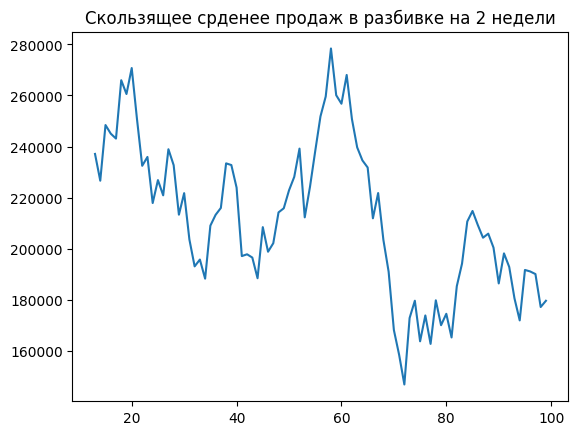

In [145]:
data.sum().plot()
plt.title('Скользящее срденее продаж в разбивке на 2 недели')
plt.show();

Агрегировать данные по кварталам

In [152]:
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')
quarter_sales = df.groupby(by='quarter')['sales'].sum().sort_values(ascending=False)
quarter_sales

quarter
2023Q1    1370376
2023Q2     131532
Freq: Q-DEC, Name: sales, dtype: int64

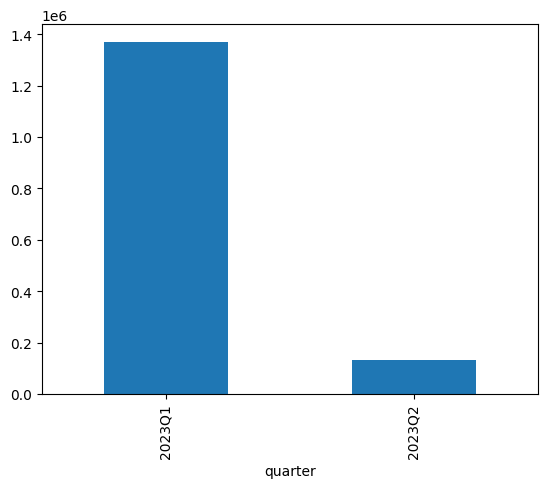

In [156]:
ax = quarter_sales.plot(kind='bar')

## 6.   Визуализация данных

*   Построить график продаж по времени
*   Создать гистограмму распределения
*   Визуализировать корреляцию между показателями

Построить график продаж по времени

<Figure size 640x480 with 0 Axes>

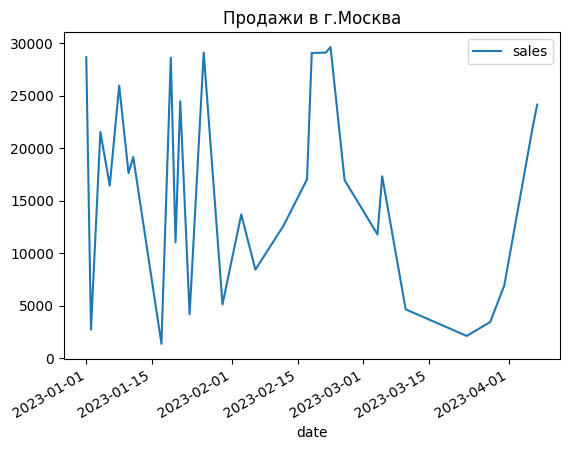

<Figure size 640x480 with 0 Axes>

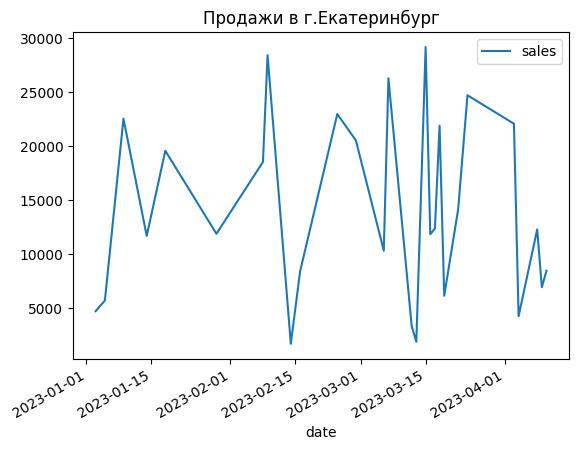

<Figure size 640x480 with 0 Axes>

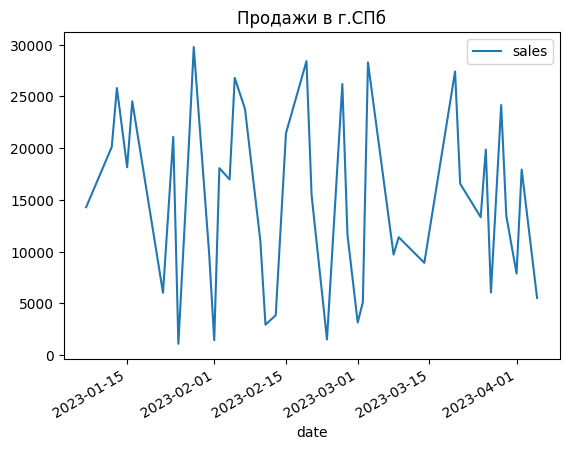

In [117]:
for i in df['city'].unique():
    plt.figure()
    df[df['city'] == i].plot(x='date', y='sales')
    plt.title(f'Продажи в г.{i}')
    plt.show()

Построить гистограмму распрделения

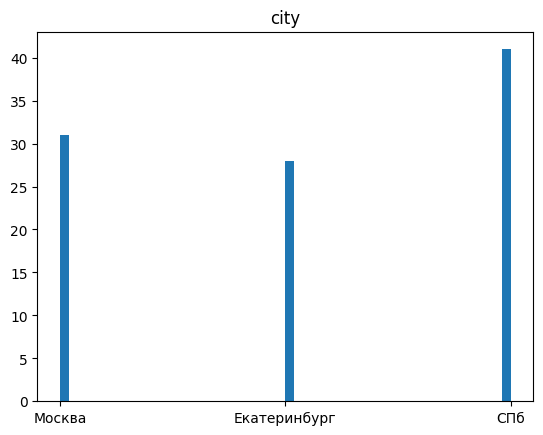

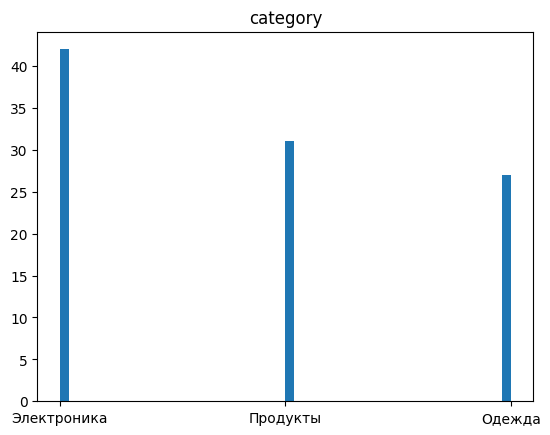

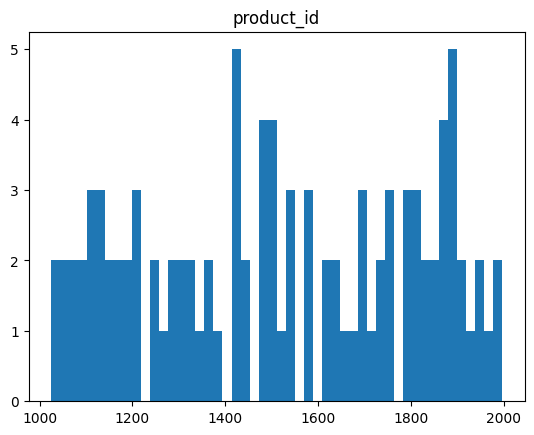

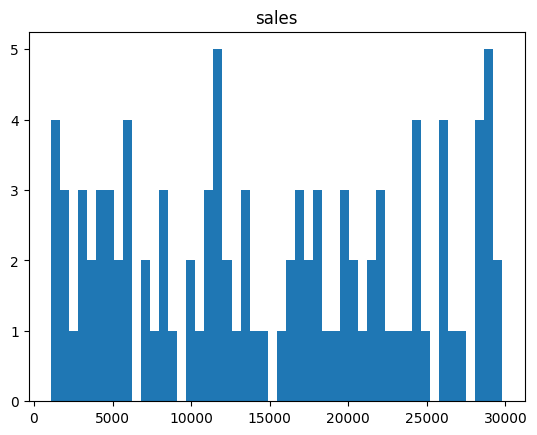

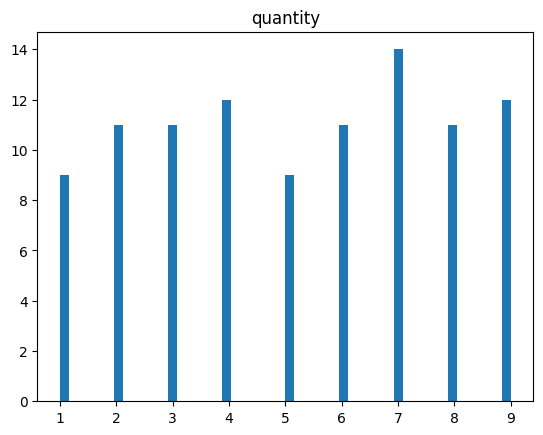

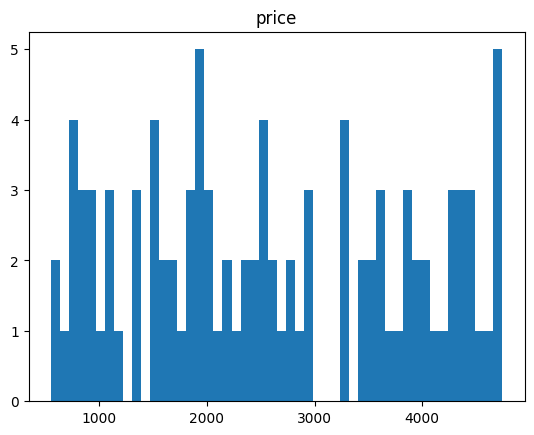

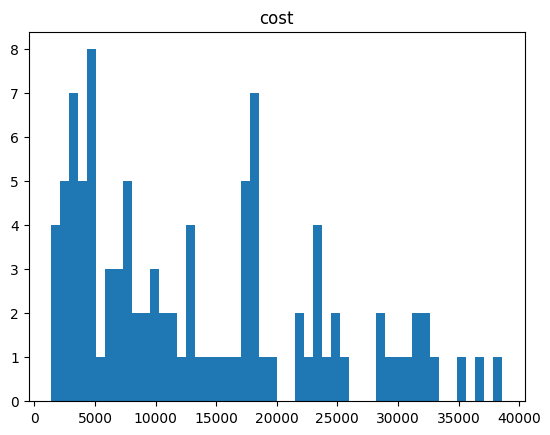

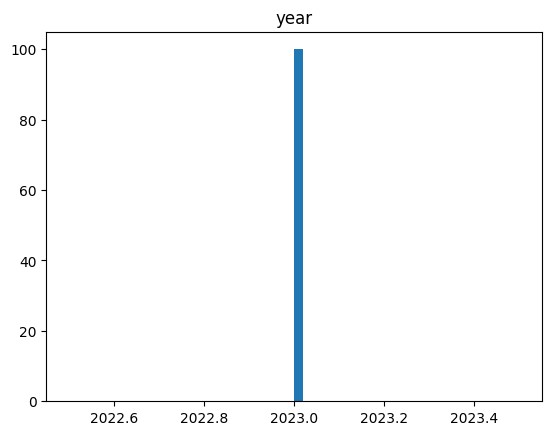

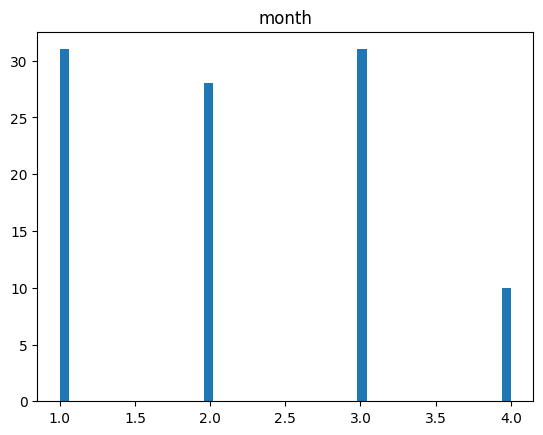

In [118]:
for i in df.columns[1:]:
    plt.figure()
    plt.hist(df[i], bins=50)
    plt.title(i)

Визуализировать корреляцию между показателями

Для этого преобразуем нечисловые данные к числовым

In [126]:
try:
    from sklearn.preprocessing import LabelEncoder
except ModuleNotFoundError:
    %pip install sklearn
    from sklearn.preprocessing import LabelEncoder

In [127]:
le = LabelEncoder()
data = df.copy()
clmns = ['date', 'city', 'category', 'year', 'month']
for i in clmns:
    le.fit(data[i])
    data[i] = le.transform(data[i])


In [132]:
try:
    import seaborn as sns
except ModuleNotFoundError:
    %pip install seaborn
    import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 689 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<Axes: >

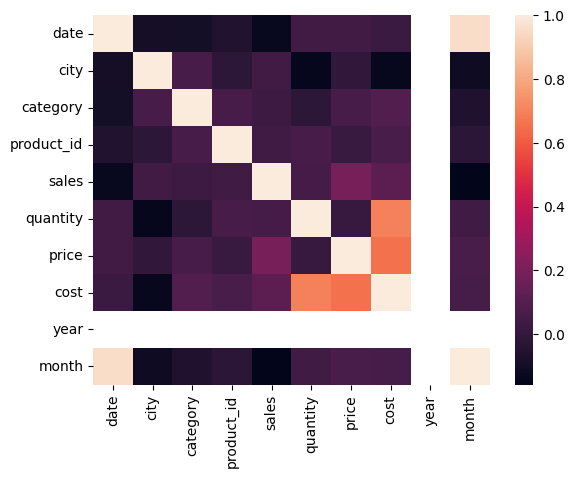

In [133]:
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)